#Лабораторная 2

## Импорты

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
df = pd.read_csv('/content/Econom_Cities_data.csv', sep=';', encoding='utf-8')

## Просмотр данных

In [31]:
df.shape

(48, 4)

In [32]:
list(df.columns)

['City', 'Work', 'Price', 'Salary']

In [33]:
df

,City,Work,Price,Salary
0,Amsterdam,1714,"65,6",49
1,Athens,1792,"53,8","30,4"
2,Bogota,2152,"37,9","11,5"
3,Bombay,2052,"30,3","5,3"
4,Brussels,1708,"73,8","50,5"
5,Buenos_Aires,1971,"56,1","12,5"
6,Cairo,-9999,"37,1",-9999
7,Caracas,2041,61,"10,9"
8,Chicago,1924,"73,9","61,9"
9,Copenhagen,1717,"91,3","62,9"


Проверяем из чего вообще состоят данные, есть ли нулы и какие типы данных

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    48 non-null     object
 1   Work    48 non-null     int64 
 2   Price   48 non-null     object
 3   Salary  48 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [35]:
df.describe()

,Work
count,48.000000
mean,1384.958333
std,2404.897007
min,-9999.000000
25%,1740.750000
50%,1834.500000
75%,1972.750000
max,2375.000000


##Чистка данных

Мне не понравилось, что price и  salary непонятного типа, приведем к числу

In [36]:
df["Price"]  = pd.to_numeric(df["Price"].astype(str).str.replace(",", "."))
df["Salary"] = pd.to_numeric(df["Salary"].astype(str).str.replace(",", "."))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    48 non-null     object 
 1   Work    48 non-null     int64  
 2   Price   48 non-null     float64
 3   Salary  48 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB


Уберем выбросы если есть по методу 3IQR

In [38]:
num_cols = ["Work","Price","Salary"]
num_df = df[num_cols].copy()

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 3 * IQR
upper = Q3 + 3 * IQR

mask = ((num_df >= lower) & (num_df <= upper)).all(axis=1)
removed_cities = df.loc[~mask, "City"].tolist()

df_clean = df.loc[mask].reset_index(drop=True)
num_clean = df_clean[num_cols].reset_index(drop=True)

print( removed_cities)

['Cairo', 'Jakarta']


##Кластеризация

Нормализуем данные

In [39]:
scaler = StandardScaler()
num_cols = ["Work", "Price", "Salary"]
X_scaled = scaler.fit_transform(df_clean[num_cols])
X = pd.DataFrame(X_scaled, columns=num_cols)

Попробуем взять число кластеров из прошлой работы для тестовоо прогона

In [40]:
#  максимальное число итераций
max_iter_1 = 300
# инициализируем модель
model = KMeans(n_clusters=4, random_state=42, max_iter=max_iter_1, n_init=10,
               verbose=0, tol=0.0001 )
model.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

Проверим достаточность итераций, их достаточно

In [41]:
model.n_iter_

6

Посмотрим как определились кластеры

In [42]:
model.labels_

array([0, 3, 1, 1, 0, 3, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 3, 1, 3, 3, 0, 0,
       0, 2, 1, 3, 0, 0, 3, 0, 3, 2, 1, 0, 3, 3, 3, 1, 2, 0, 1, 1, 2, 0,
       0, 2], dtype=int32)

Построим "локоть" чтобы определить кол-во кластеров через  K-means

Как определить число кластеров, не угадывая? <br>
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму квадратов расстояний от каждой точки данных до центра ближайшего к ней кластера. Кластеризацию будем считать условно хорошей, если инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

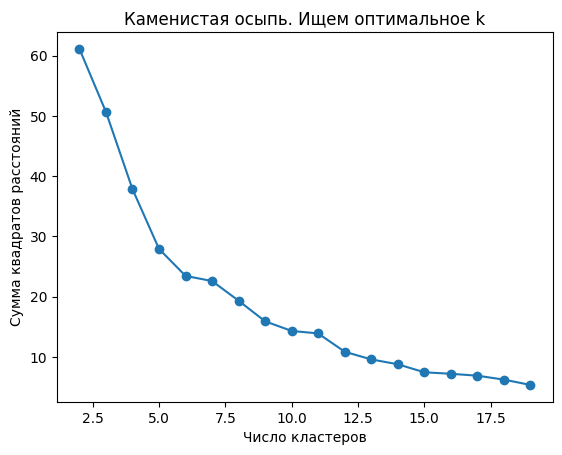

In [46]:
K = range(2, 20)

# Вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in K]
dist = [model.inertia_ for model in models]

# Строим график Локтя
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

По диаграмме локтя можно увидеть, что излом произошел около 5ти кластеров.
Это значение и будем брать

Заново переобучим модель но с 5ю кластерами

In [59]:
model = KMeans(n_clusters=5, random_state=42, max_iter=max_iter_1, n_init=10,
               verbose=0, tol=0.0001 )
model.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

Оценим какие города он объединил в какие кластеры

In [60]:
df_clean['cluster'] = model.labels_
df_clean

,City,Work,Price,Salary,cluster
0,Amsterdam,1714,65.6,49.0,4
1,Athens,1792,53.8,30.4,2
2,Bogota,2152,37.9,11.5,0
3,Bombay,2052,30.3,5.3,0
4,Brussels,1708,73.8,50.5,4
5,Buenos_Aires,1971,56.1,12.5,2
6,Caracas,2041,61.0,10.9,0
7,Chicago,1924,73.9,61.9,1
8,Copenhagen,1717,91.3,62.9,3
9,Dublin,1759,76.0,41.4,4


Посмотрим число объектов в каждом кластере

In [61]:
X['cluster'] = model.labels_
X.groupby('cluster').size()

,0
cluster,
0,9
1,6
2,11
3,8
4,12


##Итерпритация результатов

In [62]:
cluster_means = (
    df_clean.groupby("cluster")[["Work", "Price", "Salary"]]
    .mean()
    .round(3)
    .sort_index()
)
cluster_means

,Work,Price,Salary
cluster,,,
0,2132.222,50.822,14.033
1,1990.833,77.233,55.317
2,1855.455,50.782,16.591
3,1763.750,104.550,67.588
4,1735.083,75.733,53.142


Мы выразили среднее значение признаков по кластерам, для более легкой интерпритации

* К **0 кластеру** отнесли города, вероятно, индустриальные, с дешевой рабочей силой.
* К **1му кластеру** города с умеренной занятостью и средними ценами и высокими зп. Сбалансированные города.
* К **2ему кластеру** относятся города с низкой зп и низкими ценами, очень слабые экономически регионы
* К **3 кластеру** относятся крупные города, с высокими зп, высокими ценами, вероятнее всего города являются центрами чего-то
* К **4 кластеру** относятся растущие города. С немаленькими зарплатами и средними ценами, пр  этом этом невысокая занятость